<a href="https://colab.research.google.com/github/aonovoseltseva/computer_linguistics_25_26/blob/main/HW_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.RBSOUH_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.RBSOUH_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.RBSOUH_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


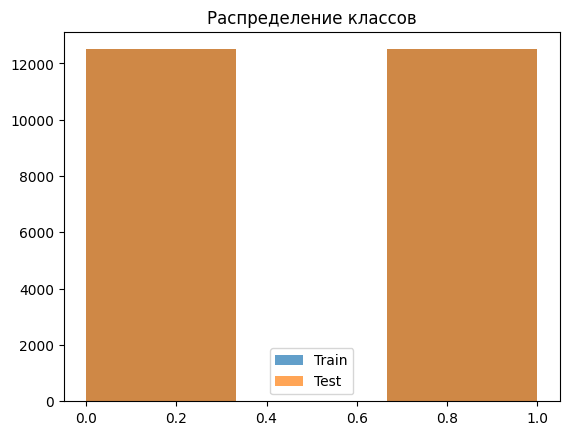

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
train_imbd, test_imbd = tfds.load( #загрузка датасета
    'imdb_reviews',
    split=['train', 'test'], #деление датасета на тренировочную часть и тестовую (тут - валидационную)
    as_supervised=True
)
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
x_train, y_train = [], [] #создаем списки для данных на будущее
x_test, y_test = [], []
for a, b in train_imbd: #преобразуем тренировочные данные в numpy
  x_train.append(a.numpy().decode('utf-8')) #для текстов (a) переходим от байтовых данных к utf-8
  y_train.append(b.numpy()) #метку класса не меняем
for a, b in test_imbd:
  x_test.append(a.numpy().decode('utf-8')) #преобразуем тестовые данные в numpy и переходим от байтовых данных к utf-8
  y_test.append(b.numpy())

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [3]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
vectorizer = keras.layers.TextVectorization(
    max_tokens=10000,  #ограничиваем словарь 100000 токенов
    output_sequence_length=200    #задаем длину последовательности 200
)

# vectorizer = keras.layers.TextVectorization(max_tokens=..., output_sequence_length=...)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
vectorizer.adapt(x_train)
# vectorizer.adapt(...)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [4]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
from tensorflow.keras import layers

vocab_size = 10000 #задаем длину словаря
sequence_length = 200 #задаем длину последовательности

model = keras.Sequential([
    #Embedding слой
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=sequence_length),

    #1D сверточный слой
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),

    #Глобальный max pooling
    layers.GlobalMaxPooling1D(),

    #Полносвязный слой
    layers.Dense(32, activation='relu'),

    #Выходной слой для бинарной классификации
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# model = keras.Sequential([...])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.7019 - loss: 0.5497 - precision: 0.7059 - recall: 0.6621 - val_accuracy: 0.8602 - val_loss: 0.3190 - val_precision: 0.8350 - val_recall: 0.9020
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9278 - loss: 0.1933 - precision: 0.9244 - recall: 0.9323 - val_accuracy: 0.8572 - val_loss: 0.3431 - val_precision: 0.8153 - val_recall: 0.9281
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9896 - loss: 0.0462 - precision: 0.9884 - recall: 0.9909 - val_accuracy: 0.8680 - val_loss: 0.3941 - val_precision: 0.8874 - val_recall: 0.8467
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9996 - loss: 0.0072 - precision: 0.9992 - recall: 1.0000 - val_accuracy: 0.8734 - val_loss: 0.4523 - val_precision: 0.8739 - val_recall: 0.8763
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 1.0000 - loss: 9.5369e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.8744 - val

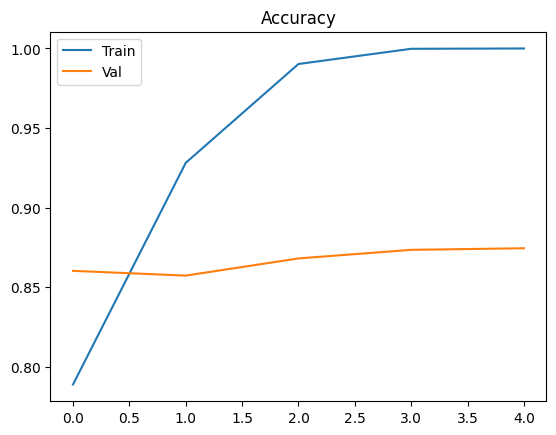

In [5]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
from tensorflow.keras import metrics

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)
# model.compile(...)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###

x_train_vec = vectorizer(x_train).numpy() #векторизуем данные. чтобы они могли быть обработаны моделью
x_test_vec  = vectorizer(x_test).numpy()


y_train = np.array(y_train)
y_test  = np.array(y_test)

history = model.fit(
    x_train_vec, y_train, #обучаем модель на тренировочных данных (train)
    epochs=5, #задаем 5 эпох
    batch_size=32,
    validation_split=0.2
)
# history = model.fit(...)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [6]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(
    x_test_vec,
    y_test,
    batch_size=32
)
# test_loss, test_acc, test_prec, test_rec = model.evaluate(...)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"

    pred_prob = model.predict(x_test_vec[i:i+1])
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"

    print(
        f"{text[:250]}... | "
        f"True: {true_label} | "
        f"Pred: {pred_label} ({pred_prob[0][0]:.2f})"
    )

    # предсказание вероятности
    pred_prob = model.predict(x_test_vec[i:i+1])
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"

    print(
        f"{text[:250]}... | "
        f"True: {true_label} | "
        f"Pred: {pred_label} ({pred_prob[0][0]:.2f})"
    )
    # pred_prob = model.predict(...)
    # pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8639 - loss: 0.5112 - precision: 0.8637 - recall: 0.8628
Тестовая accuracy: 0.8654
Тестовая precision: 0.8671
Тестовая recall: 0.8632
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured... | True: POS | Pred: POS (1.00)
There are films that make careers. For George Rome... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
A blackly comic tale of a down-trodden 

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность при работе с валидационной выборкой - 87.44% (val_accuracy: 0.8744).
2.  Точность на тренировочной выборке - 1, что уже указывает на переобучение. Точность на валидационной выборке ниже и значимо не прогрессирует с увеличением количества эпох (82% -> 87%). Переобучение наступило еще на этапе второй эпохи, когда точность на тренировочных данных с 70.19% увеличилась до 92.78% за один цикл, а валидационная уменьшилась с 86.02% до 85.72%
3.  As long as you keep in mind that the production of this movie was a copyright ploy, and not intended as a serious release, it is actually surprising how not absolutely horrible it is. I even liked the theme music.... отзыв помечен как негативный, хотя тональность отзыва выражается не столько в самих окрашенных словах, сколько в их сочетаемости. Наличие негативной первой части в целом подчеркивает позитивность второй и делает отзыв тонально позитивным.